# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [80]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:


# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 5

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")



Processing Record 1 of Set 5 | atuona
Processing Record 2 of Set 5 | port moresby
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | hithadhoo
City not found. Skipping...
Processing Record 5 of Set 5 | san nicolas
Processing Record 6 of Set 5 | rocha
Processing Record 7 of Set 5 | yulara
Processing Record 8 of Set 5 | singaraja
Processing Record 9 of Set 5 | butaritari
City not found. Skipping...
Processing Record 10 of Set 5 | ushuaia
Processing Record 11 of Set 5 | mtambile
Processing Record 12 of Set 5 | ixtapa
Processing Record 13 of Set 5 | amudat
Processing Record 14 of Set 5 | tigil
Processing Record 15 of Set 5 | torbay
Processing Record 16 of Set 5 | nome
Processing Record 17 of Set 5 | busselton
Processing Record 18 of Set 5 | kavaratti
Processing Record 19 of Set 5 | esperance
Processing Record 20 of Set 5 | koslan
Processing Record 21 of Set 5 | sarkand
Processing Record 22 of Set 5 | faya
Processing Record 23 of Set 5 | new norfolk
Processing Record 24 of

Processing Record 35 of Set 8 | hambantota
Processing Record 36 of Set 8 | saskylakh
Processing Record 37 of Set 8 | pio ix
Processing Record 38 of Set 8 | machaneng
Processing Record 39 of Set 8 | beaupre
Processing Record 40 of Set 8 | tommot
Processing Record 41 of Set 8 | port-gentil
Processing Record 42 of Set 8 | mabaruma
Processing Record 43 of Set 8 | ahipara
Processing Record 44 of Set 8 | suntar
Processing Record 45 of Set 8 | port macquarie
City not found. Skipping...
Processing Record 46 of Set 8 | bonavista
Processing Record 47 of Set 8 | kirakira
Processing Record 48 of Set 8 | dasoguz
Processing Record 49 of Set 8 | owando
Processing Record 1 of Set 9 | warrnambool
Processing Record 2 of Set 9 | lakatoro
Processing Record 3 of Set 9 | male
Processing Record 4 of Set 9 | andenes
Processing Record 5 of Set 9 | jalu
Processing Record 6 of Set 9 | kasongo-lunda
Processing Record 7 of Set 9 | zlutice
City not found. Skipping...
Processing Record 8 of Set 9 | half moon bay
Pro

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

## Convert Raw Data to DataFrame
* Save as csv

In [117]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}
weather_dict

weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,5,PF,1603225116,75,-9.80,-139.03,77.54,19.44
1,port moresby,100,CD,1603225116,62,-7.03,29.76,78.15,7.65
2,avarua,36,CK,1603225116,88,-21.21,-159.78,77.00,5.82
3,hithadhoo,98,MV,1603225116,80,-0.60,73.08,82.31,14.12
4,san nicolas,0,ML,1603224903,29,13.30,-4.90,86.81,1.14
5,rocha,100,UY,1603224926,85,-34.48,-54.33,52.29,10.58
6,yulara,0,AU,1603225116,72,-25.24,130.99,66.20,8.05
7,singaraja,0,ID,1603225117,64,-8.11,115.09,79.38,3.22
8,butaritari,97,KI,1603224913,76,3.07,172.79,81.77,12.03
9,ushuaia,75,AR,1603225117,59,-54.80,-68.30,44.60,14.99


In [118]:

# output data to csv
weather_dataframe.to_csv(r'weather_dataframe.csv')

In [119]:
weather_dataframe.count()

City          328
Cloudiness    328
Country       328
Date          328
Humidity      328
Lat           328
Lng           328
Max Temp      328
Wind Speed    328
dtype: int64

In [120]:

weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,5,PF,1603225116,75,-9.80,-139.03,77.54,19.44
1,port moresby,100,CD,1603225116,62,-7.03,29.76,78.15,7.65
2,avarua,36,CK,1603225116,88,-21.21,-159.78,77.00,5.82
3,hithadhoo,98,MV,1603225116,80,-0.60,73.08,82.31,14.12
4,san nicolas,0,ML,1603224903,29,13.30,-4.90,86.81,1.14


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

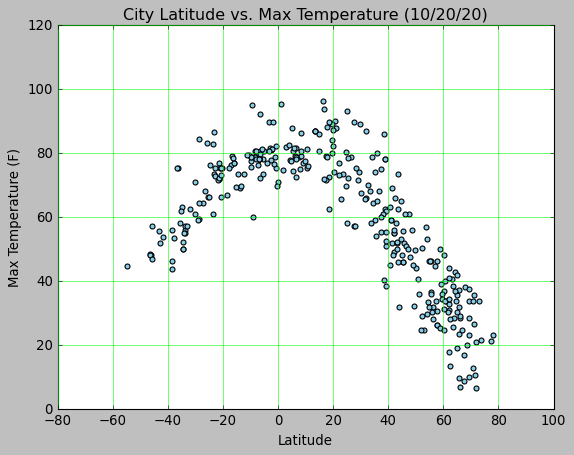

In [86]:


plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lime")
plt.savefig("Fig1.png")
plt.show()



### Latitude vs. Humidity Plot

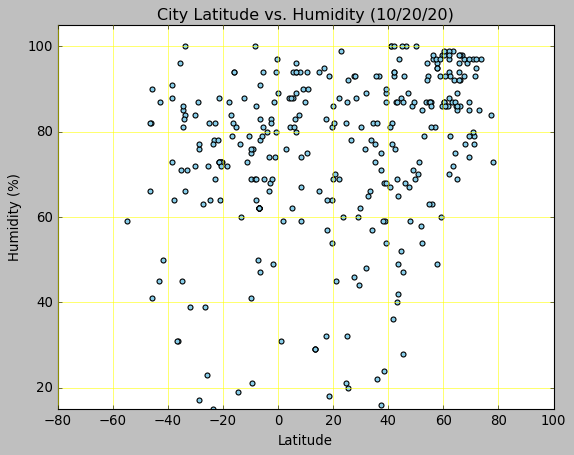

In [87]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="yellow")
plt.savefig("Fig2.png")
plt.show()

### Latitude vs. Cloudiness Plot

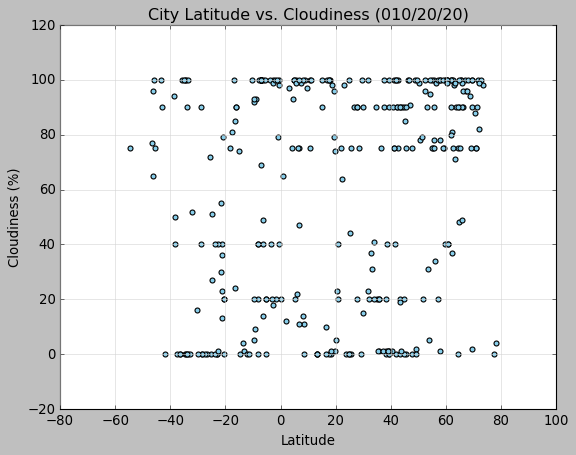

In [88]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (010/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.savefig("Fig3.png")
plt.show()

### Latitude vs. Wind Speed Plot

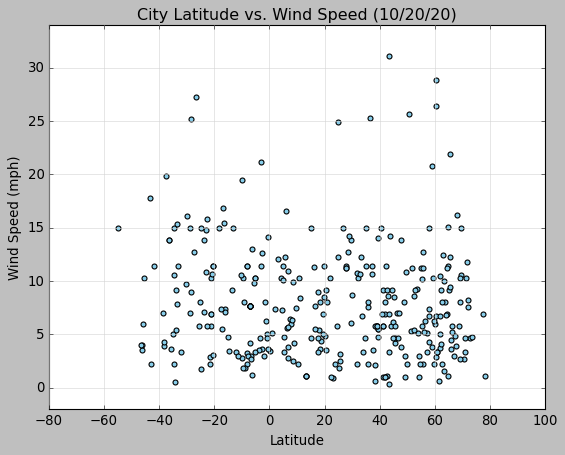

In [89]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")
plt.savefig("Fig4.png")

plt.show()



## Linear Regression

### Write linear regression plot function (optional)

In [98]:
L=0
Northern = weather_dataframe.query(f"Lat >= {L}")
Southern = weather_dataframe.query(f"Lat <= {L}")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [105]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-value is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig("fig.png")
    plt.show()



The r-value is: -0.8933536906942292


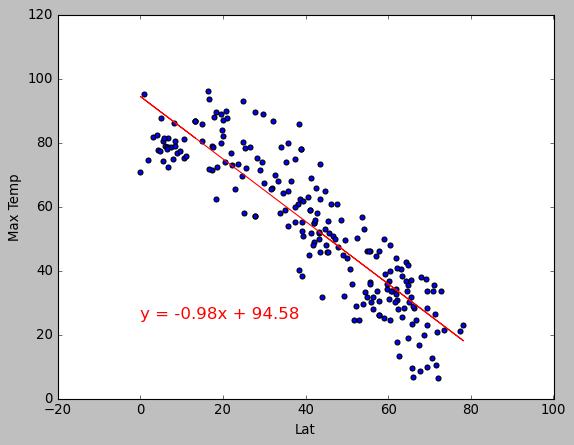

In [106]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(Northern[xlbl],Northern[ylbl],xlbl,ylbl,lblpos,5)

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8143485647865759


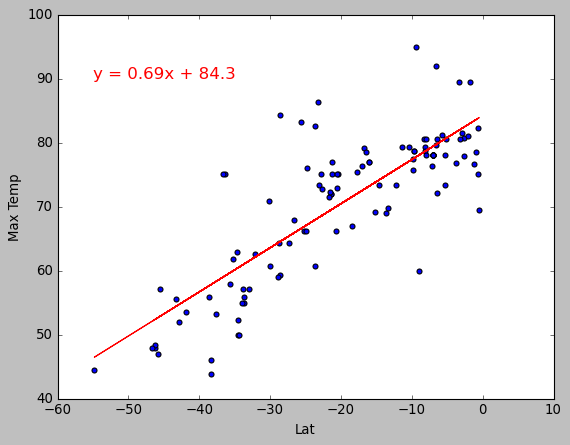

In [107]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(Southern[xlbl],Southern[ylbl],xlbl,ylbl,lblpos,6)

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.31345572986477516


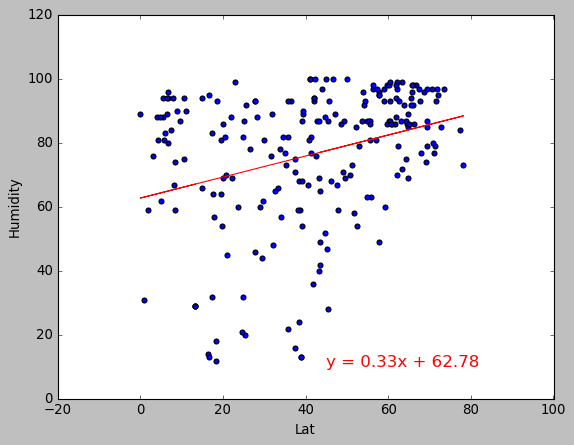

In [108]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(Northern[xlbl],Northern[ylbl],xlbl,ylbl,lblpos,7)

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [112]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(Southern[xlbl],Southern[ylbl],xlbl,ylbl,lblpos,8)

KeyError: 'Latitude'

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23060458227887842


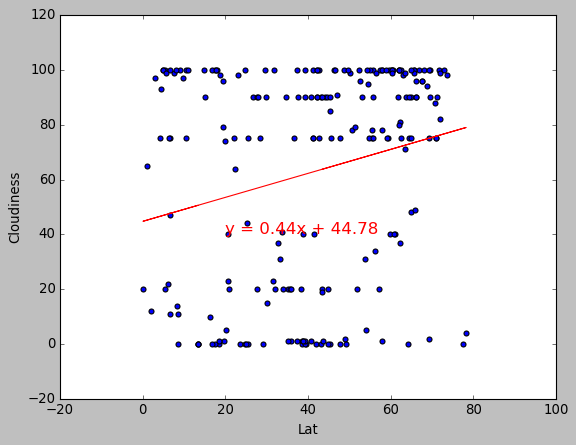

In [113]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(Northern[xlbl],Northern[ylbl],xlbl,ylbl,lblpos,9)

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10227453512191725


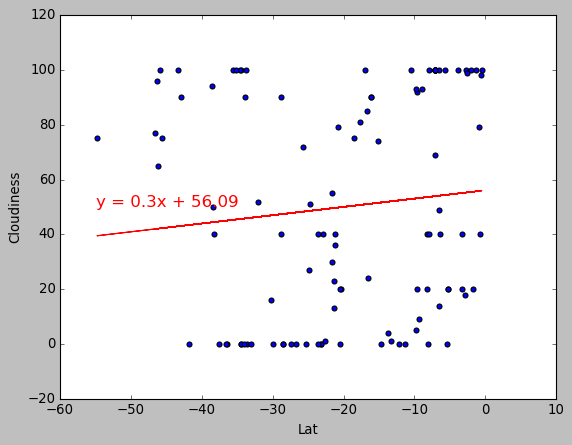

In [114]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(Southern[xlbl],Southern[ylbl],xlbl,ylbl,lblpos,10)

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03180081765178623


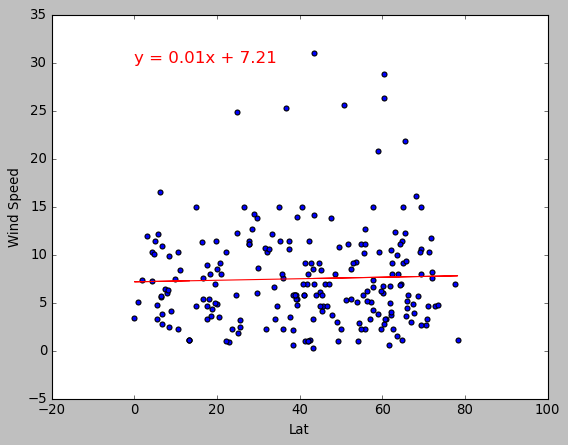

In [115]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(Northern[xlbl],Northern[ylbl],xlbl,ylbl,lblpos,11)

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14562252815042506


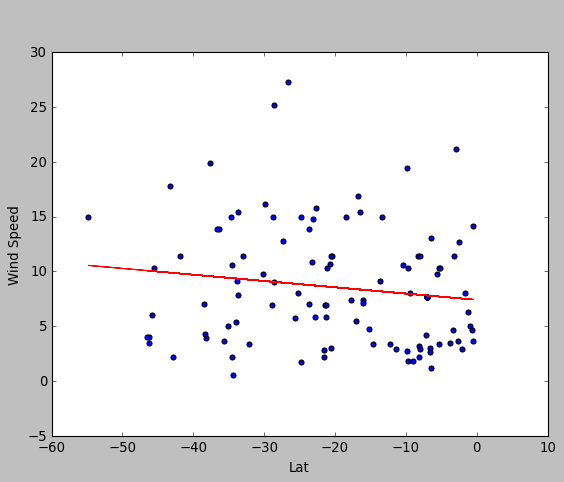

In [116]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(Southern[xlbl],Southern[ylbl],xlbl,ylbl,lblpos,12)